![alt text](https://www.freepnglogos.com/uploads/starbucks-logo-png-1.png)

# Geospatial and Exploratory Analysis of Starbucks Locations
In this notebook I explore the the Starbucks Store Location dataset, and use the python framework Folium to define their individual locations on a coordinate map.



  
# Brief Starbucks History

Initially founded by Jerry Baldwin, Zev Siegl, and Gordon Bowker in 1971, Starbucks opened its first store at 1912 Pike's Place in Seattle, Washington. The future CEO, Howard Schultz joined with the young company in 1982 as the Director of Retail Operations & Marketing. In 1983, Schultz took his revolutionary trip across Italy, where fell in love with the concept of a "coffeehouse". Returning to the United States at the beginning of 1984, he explains the coffeehouse concept to the owner's, and convinces them to give it a try. The first Cafe Latte was sold later that year. After the coffeehouse expiriment's success, Shultz stepped away from Starbuck's and founded II Giornale ,"The Jounal". 

From 1985-1987, Il Giornale grew substantially, and at the end of 1987 acquired the Starbuck's shop on Pike's Place. The acquisition then formed, what we know today as the Starbuck's Corporation. Before the end of 1987, there were 17 Starbucks Coffeehouses in cities such as Chicago, Vancouver, and Seattle. In 30 years from 1988-2018, Starbuck's went from only 33 stores to 25,,600 stores worldwide. 

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium 
from folium import plugins
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring the DataFrame

In [4]:
#Read in the Store Directory file 
SB_Df = pd.read_csv('/Users/Jaseibert/dev/Starbucks_Stores/directory.csv')

#Transform the CSV file into a DataFrame
SB_Df= pd.DataFrame(SB_Df)

### A. What does the Dataframe look like?

In [6]:
SB_Df.head(5)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Y,X
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


### B. What is the Percentage of Null values?

In [7]:
SB_Df.notnull().sum() * 100/SB_Df.shape[0]

Brand             100.000000
Store Number      100.000000
Store Name        100.000000
Ownership Type    100.000000
Street Address     99.992188
City               99.941406
State/Province    100.000000
Country           100.000000
Postcode           94.054688
Phone Number       73.199219
Timezone          100.000000
Y                  99.996094
X                  99.996094
dtype: float64

### C. What are the Top 20 Countries with the most Starbucks?

In [8]:
SB_Df.Country.value_counts().head(20) 

US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
TH      289
ID      268
MY      234
DE      160
AE      144
FR      132
SG      130
RU      109
AR      108
KW      106
Name: Country, dtype: int64

### D. What are the Top 20 Cities in the World with the most Starbucks?
** For English Speakers **
* 上海市 = Shanghai, China
* 北京市  = Beijing, China
* 서울  = Seoul, Korea

In [9]:
SB_Df.City.value_counts().head(20)

上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Mexico City    180
Chicago        180
Seattle        156
Las Vegas      156
Houston        154
Istanbul       144
Vancouver      141
서울             136
San Diego      135
Calgary        130
Los Angeles    127
Singapore      127
Taipei City    126
Jakarta        123
Name: City, dtype: int64

### E. What Type of Starbucks is it?
* ** Company Owned - are Starbucks which are ran by Starbucks Corporate**
* ** Licensed Stores - are independently ran, but abide by Starbucks Practice's (think Target, Kroger, Barne's & Noble, etc.) **
* ** Joint Venture Stores - are typically found outside North America and are Starbucks combined with another Company (think a Starbucks inside of a McDonalds)**
* **Francise Stores - are identical to Company owned Starbucks except they GM is the owner of the store and has stake in its success/failure**

In [10]:
SB_Df["Ownership Type"].value_counts().head(4)

Company Owned    11932
Licensed          9375
Joint Venture     3976
Franchise          317
Name: Ownership Type, dtype: int64

## Lets graph those!

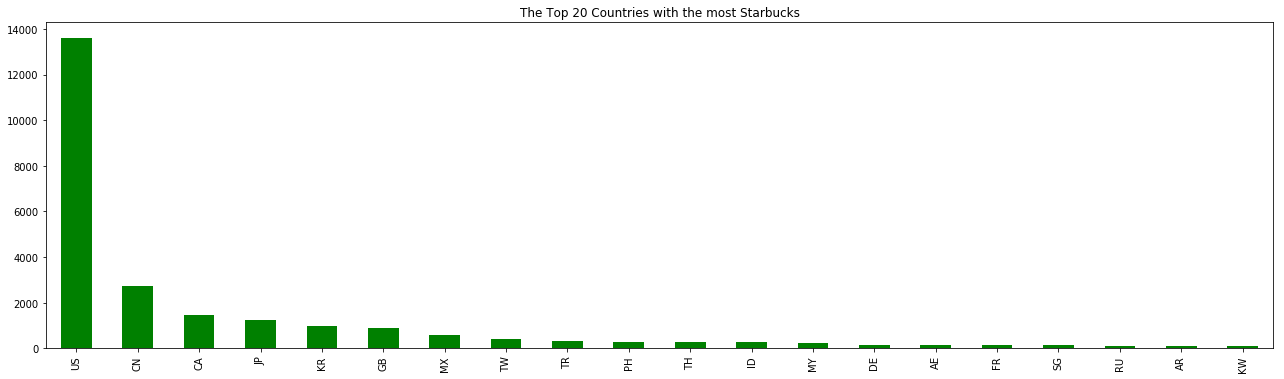

In [12]:
figure = plt.figure(figsize=(22,6))
axes = figure.add_subplot(111)
axes.set(title = "The Top 20 Countries with the most Starbucks")
SB_Df.Country.value_counts().head(20).plot(kind="bar", color = "green")

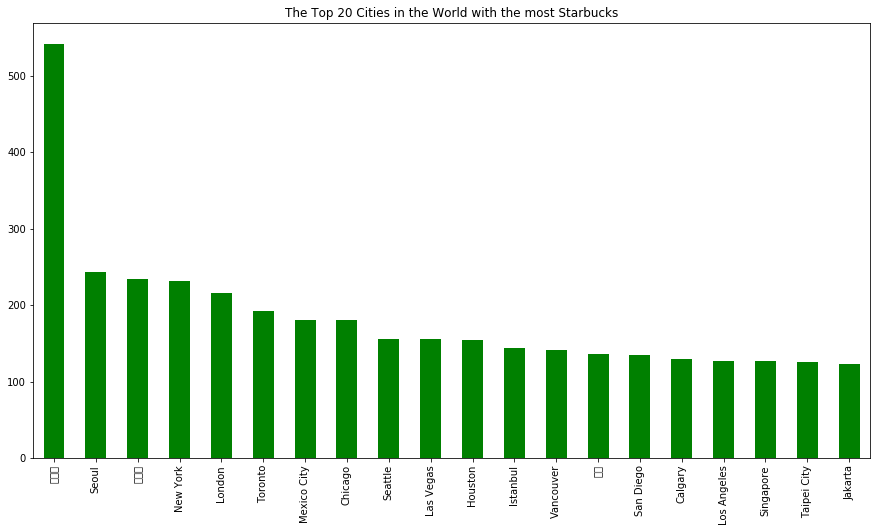

In [14]:
figure = plt.figure(figsize=(15,8))
axes = figure.add_subplot(111)
axes.set(title = "The Top 20 Cities in the World with the most Starbucks")
SB_Df.City.value_counts().head(20).plot(kind="bar", color = "green")

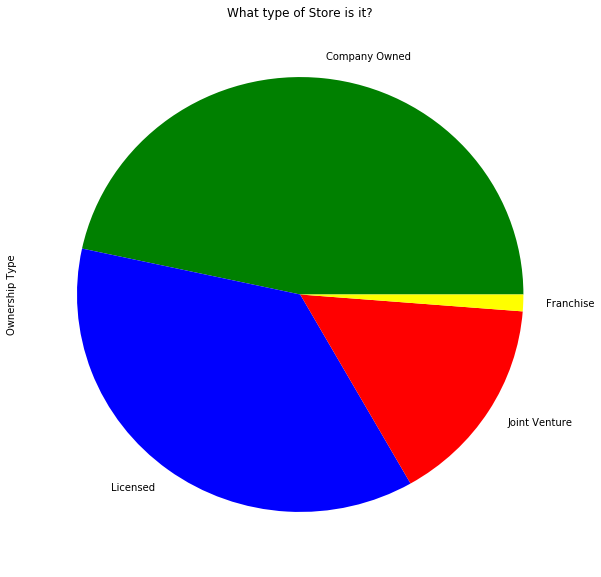

In [15]:
figure = plt.figure(figsize=(10,10))
axes = figure.add_subplot(111)
axes.set(title = "What type of Store is it?")
SB_Df['Ownership Type'].value_counts().plot(kind="pie", colors = ["green", "blue", "red", "yellow"])
plt.show()

## Plot the Stores on a Map using Folium

### Step 1: Find how many null Latitude & Longitude Values the are 

In [16]:
#Find all the NaN Values in the DataFrame
SB_Df.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Y                    1
X                    1
dtype: int64

### Step 2: Define Coordinate Pairs & Eliminate Null Values

In [19]:
#Combine the Lat & Long values into a location var
location = SB_Df[['X','Y']]

#Transform the NaN values into (0,0) 
location.fillna(0, inplace=True)

#Transform the location values into a list
locationList = location.values.tolist()
len(locationList)

#check random var
locationList[223]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


[-34.6, -58.4]

### Step 3: Define Map Parameters & iterate over coordinate pairs to plot

In [ ]:
#Define initial map parameters
Evansville_Coordinates = (37.987734, -87.534703)

#Create empty map zoomed in on Evansville
map = folium.Map(location= Evansville_Coordinates, tiles='CartoDB dark_matter', zoom_start=11)
marker_cluster = folium.plugins.MarkerCluster().add_to(map)

#Create a for loop & itterate through each store location 
for loc in range(0, len(locationList)):
    folium.Marker(locationList[loc], popup=SB_Df['Store Number'][loc], icon=folium.Icon(color='green', icon_color='white', icon='info-sign')).add_to(marker_cluster)
map